In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report

In [29]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets


In [30]:
%matplotlib  inline
plt.figure(figsize=(7,4))


<Figure size 700x400 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [31]:
iris = datasets.load_iris()

X = scale(iris.data)
Y = pd.DataFrame(iris.target)
variable_names = iris.feature_names
X[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

In [32]:
clustering = KMeans(n_clusters=3,random_state=5)
clustering.fit(X)

/Users/ibm/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=5)

In [33]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

Y.columns =['Targets']

Text(0.5, 1.0, 'KMeans Classification')

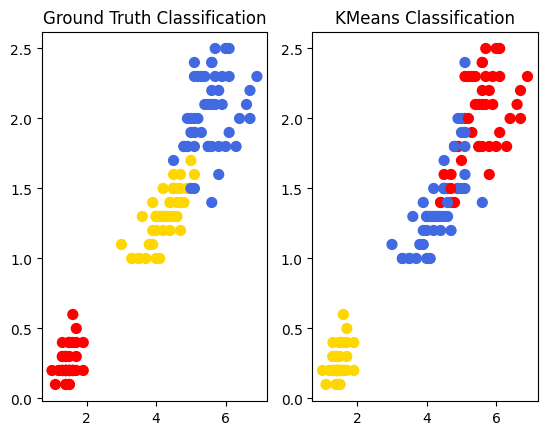

In [34]:
color_theme = np.array(['red','gold','royalblue'])

plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[clustering.labels_],s=50)
plt.title('KMeans Classification')

Text(0.5, 1.0, 'KMeans Classification')

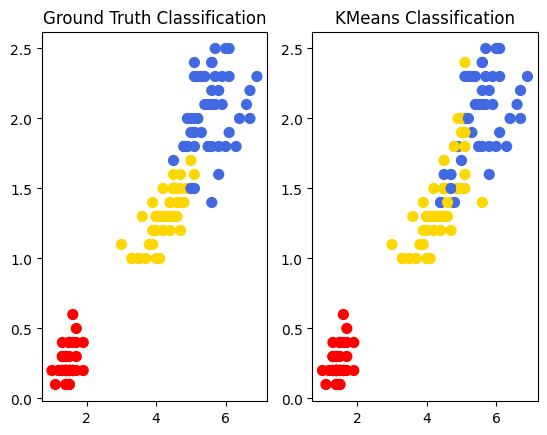

In [41]:
relabel = np.choose(clustering.labels_,[2,0,1]).astype(np.int64)


plt.subplot(1,2,1)

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[iris.target],s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x=iris_df.Petal_Length,y=iris_df.Petal_Width,c=color_theme[relabel],s=50)
plt.title('KMeans Classification')

In [43]:
print(classification_report(Y,relabel))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.74      0.78      0.76        50
           2       0.77      0.72      0.74        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



In [37]:
print("Clustering Labels:", clustering.labels_)
print("Unique Clustering Labels:", np.unique(clustering.labels_))

Clustering Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
Unique Clustering Labels: [0 1 2]


In [38]:
print("True Labels:", iris.target)
print("Unique True Labels:", np.unique(iris.target))

True Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Unique True Labels: [0 1 2]


In [39]:
# Original relabeling logic
relabel = np.choose(clustering.labels_, [0, 2, 1]).astype(np.int64)
print("Relabeled Clustering Labels:", relabel)


Relabeled Clustering Labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0
 0 1]


In [40]:
from sklearn.metrics import classification_report

report = classification_report(iris.target, relabel)
print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.74      0.78      0.76        50
           2       0.00      0.00      0.00        50

    accuracy                           0.26       150
   macro avg       0.25      0.26      0.25       150
weighted avg       0.25      0.26      0.25       150

